<a href="https://colab.research.google.com/github/Keqing1109/api/blob/main/RSM8413/Chapter_Nine_Analysis_on_Churn_Numeric_Deicison_Tree_After_Class_Three_Thursday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# once imported the Pandas first, the dataset file will be readed as pandas dataframe

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
churn = pd.read_csv("churn.txt")

In [ ]:
churn.shape

(3333, 21)

In [ ]:
churn.head(10)
#Information of custormers, Areacodes; Certain adds-ons 'VMialPlan', behaviour variables, day and night calss, minutes, Customer Service Call- important, Churn is the target variable
# Relationships, Statstics Summarys, std, mean, scatterplots, histograms, visualizations; KIS- Keep it small and simple- small sample, few variables, exellcent predictive ability

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [ ]:
churn.dtypes

,0
State,object
Account Length,int64
Area Code,int64
Phone,object
Int'l Plan,object
VMail Plan,object
VMail Message,int64
Day Mins,float64
Day Calls,int64
Day Charge,float64


In [ ]:
#Area Code-Catergorical variables, Int'Plan, VMail Plan, text, lots of floats decimals, Churn-text file, try to utranform into boolean
# international, Vmailplans, we need to transform into numerics, dummy variables
churn.info()# Info summarize all informations of your dataset, especially missing values, need to cleaned missing cells in the preprocessing.
#Explore, diving in, connections, relationship, infering, plotting, historalgrams, visualization patterns
#Numerics variables use Mean, Std, Median; Visualization : Plots, densitly plots
#Catergories vairbales, barcharts, cross-tabulation-gain insights between variable associations
# Target is Churn.Figure out whether we have relationships

#Leave Clearn up to you. clearn the variables names spaces, commas, de-capitalized word and remove space with "-" and "_"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [ ]:
churn["Churn?"] #Take a look into churn, particular column; technically this is a pandas serires

,Churn?
0,False.
1,False.
2,False.
3,False.
4,False.
...,...
3328,False.
3329,False.
3330,False.
3331,False.


In [ ]:
churn["Churn?"].value_counts()

,count
Churn?,
False.,2850
True.,483


In [ ]:
churn["Churn?"].value_counts(normalize = True) * 100
#Copy and pasted, 85.5% not churn, 14.5% churn percentage

,proportion
Churn?,
False.,85.509
True.,14.491


Text(0.5, 1.0, 'Churning Customers')

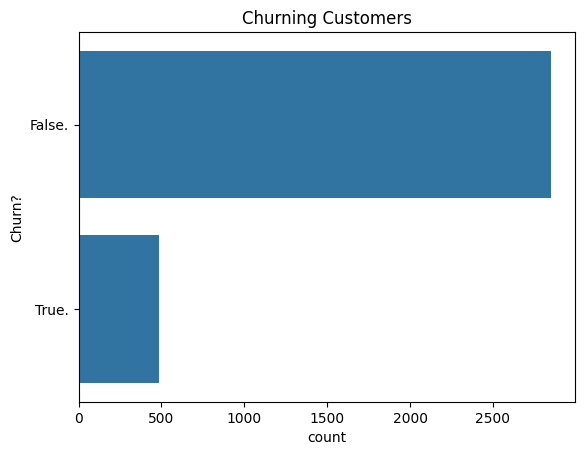

In [ ]:
# Use Seaborns in the bar charts
# Color is here to particular highlight a point, be careful of color, leave it clean for clear and concise message
ax = sns.countplot(churn["Churn?"])
ax.set_title("Churning Customers")

<Axes: title={'center': 'Churning Customers'}, xlabel='Churn?'>

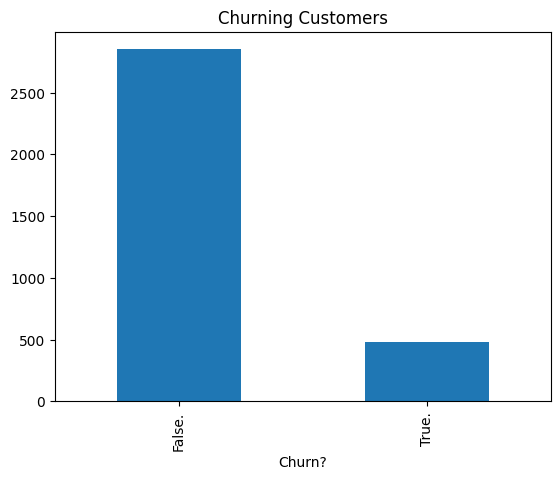

In [ ]:
# Matplotlib - pandas are intergrated, pick one cloumn peformance a varibale count on the cplumn then plot it using Matplotlib
churn["Churn?"].value_counts().plot(kind='bar', title='Churning Customers')
# the flip the graphic

In [ ]:
#Calculate on paper, percentage for cross-tabulations
# The churn numbers variation is different distinguish "internation plan", noisy, seem to be connection churning and international plan.
# Create an Crosstable for Churn and Int'l Pan
churn_crosstab = pd.crosstab(churn["Churn?"], churn["Int'l Plan"], margins=False)


In [ ]:
churn_crosstab

Int'l Plan,no,yes
Churn?,,
False.,2664,186
True.,346,137


In [ ]:
pd.crosstab(churn["Churn?"], churn["Int'l Plan"], margins=True) # don't rewtite avriablrs, we want to use the original vairbales

Int'l Plan,no,yes,All
Churn?,,,
False.,2664,186,2850
True.,346,137,483
All,3010,323,3333


<Axes: xlabel="Int'l Plan", ylabel='count'>

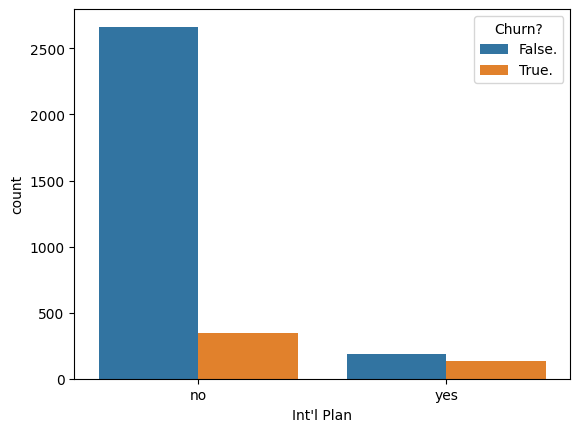

In [ ]:
#Seaborn
sns.countplot(x="Int'l Plan", hue="Churn?", data=churn) #Use seaborn, hue splite the dataset into subsets, seaborn is not related with pandas, link pandas series
# hue not stacked,

In [ ]:
#Matplotlib
churn_crosstab = churn_crosstab.transpose()

<Axes: xlabel="Int'l Plan">

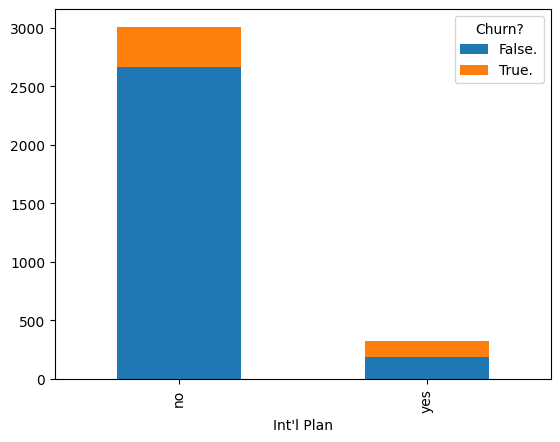

In [ ]:
churn_crosstab.plot(kind = 'bar', stacked = True)

In [ ]:
churn_crosstab

Churn?,False.,True.
Int'l Plan,,
no,2664,346
yes,186,137


<Axes: xlabel="Int'l Plan">

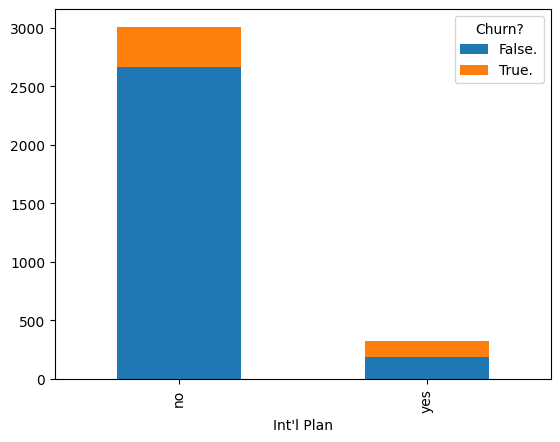

In [ ]:
churn_crosstab.plot(kind = 'bar', stacked =True)

In [ ]:
churn_crosstab_norm = churn_crosstab.div(churn_crosstab.sum(axis=1), axis=0)
#Normalized the cross tab variables for percentage protions

In [ ]:
churn_crosstab_norm

Churn?,False.,True.
Int'l Plan,,
no,0.885,0.115
yes,0.576,0.424


<Axes: xlabel="Int'l Plan">

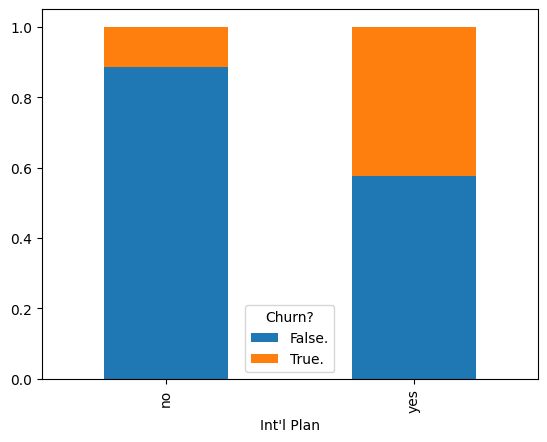

In [ ]:
churn_crosstab_norm.plot(kind = 'bar', stacked = True)
# people has the voice mail plan the proportion of churning is 61%, the people don't have the voice mail plan the porption of chining is 81%

In [ ]:
# Exploring the numeric variables, in the 13:14P.M.
churn.describe()
# Summarize tables for numberic variables calculation on means, std, min,25% 50%,75% max
# Customer service call range from 0-9 calls.Q1 =1 call, Q3=2 calls, extremely right-skewed

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000
mean,101.065,437.182,8.099,179.775,100.436,30.562,200.980,100.114,17.084,200.872,100.108,9.039,10.237,4.479,2.765,1.563
std,39.822,42.371,13.688,54.467,20.069,9.259,50.714,19.923,4.311,50.574,19.569,2.276,2.792,2.461,0.754,1.315
min,1.000,408.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,23.200,33.000,1.040,0.000,0.000,0.000,0.000
25%,74.000,408.000,0.000,143.700,87.000,24.430,166.600,87.000,14.160,167.000,87.000,7.520,8.500,3.000,2.300,1.000
50%,101.000,415.000,0.000,179.400,101.000,30.500,201.400,100.000,17.120,201.200,100.000,9.050,10.300,4.000,2.780,1.000
75%,127.000,510.000,20.000,216.400,114.000,36.790,235.300,114.000,20.000,235.300,113.000,10.590,12.100,6.000,3.270,2.000
max,243.000,510.000,51.000,350.800,165.000,59.640,363.700,170.000,30.910,395.000,175.000,17.770,20.000,20.000,5.400,9.000


array([[<Axes: title={'center': 'Account Length'}>,
        <Axes: title={'center': 'Area Code'}>,
        <Axes: title={'center': 'VMail Message'}>,
        <Axes: title={'center': 'Day Mins'}>],
       [<Axes: title={'center': 'Day Calls'}>,
        <Axes: title={'center': 'Day Charge'}>,
        <Axes: title={'center': 'Eve Mins'}>,
        <Axes: title={'center': 'Eve Calls'}>],
       [<Axes: title={'center': 'Eve Charge'}>,
        <Axes: title={'center': 'Night Mins'}>,
        <Axes: title={'center': 'Night Calls'}>,
        <Axes: title={'center': 'Night Charge'}>],
       [<Axes: title={'center': 'Intl Mins'}>,
        <Axes: title={'center': 'Intl Calls'}>,
        <Axes: title={'center': 'Intl Charge'}>,
        <Axes: title={'center': 'CustServ Calls'}>]], dtype=object)

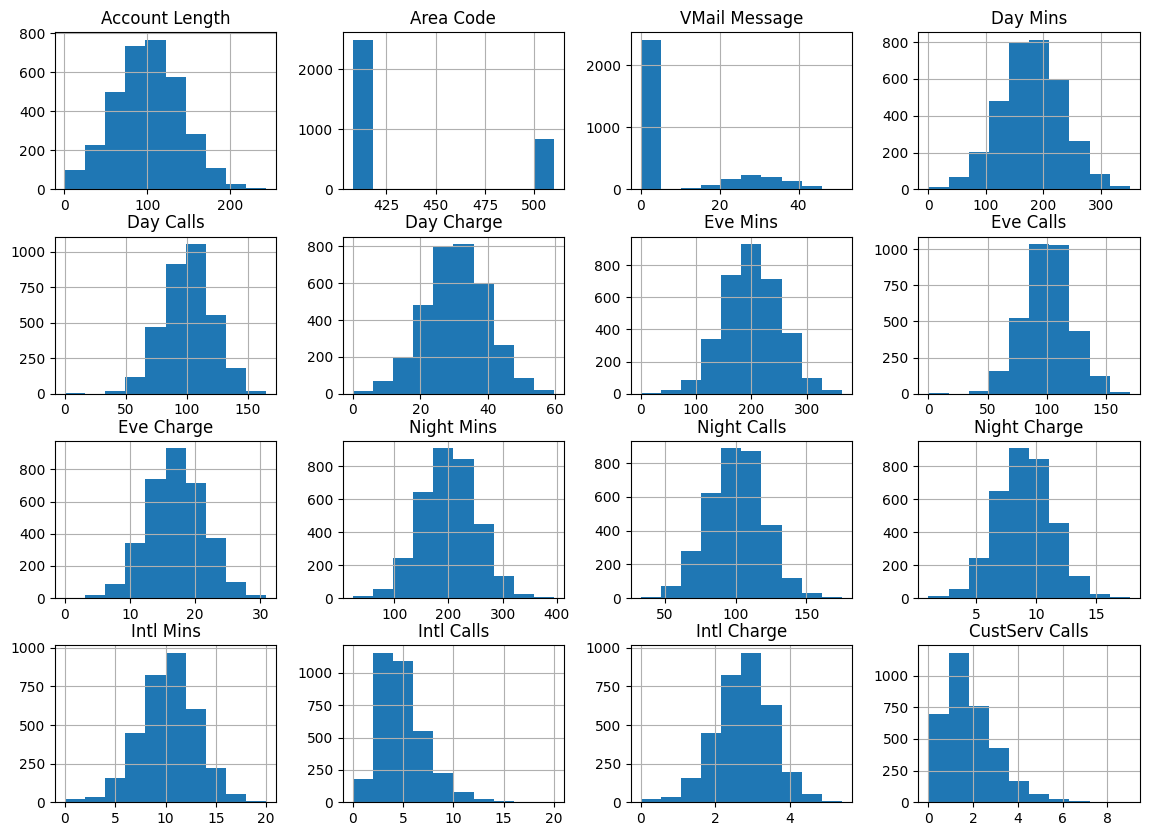

In [ ]:
churn.hist(figsize = (14,10))
# Create all the historgrams for all numeric variables, some already shown bell-shaped as 3333 customers
# For customer service calls, it is strongly skewed
# Goal, relationship between customer service calls and churns

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

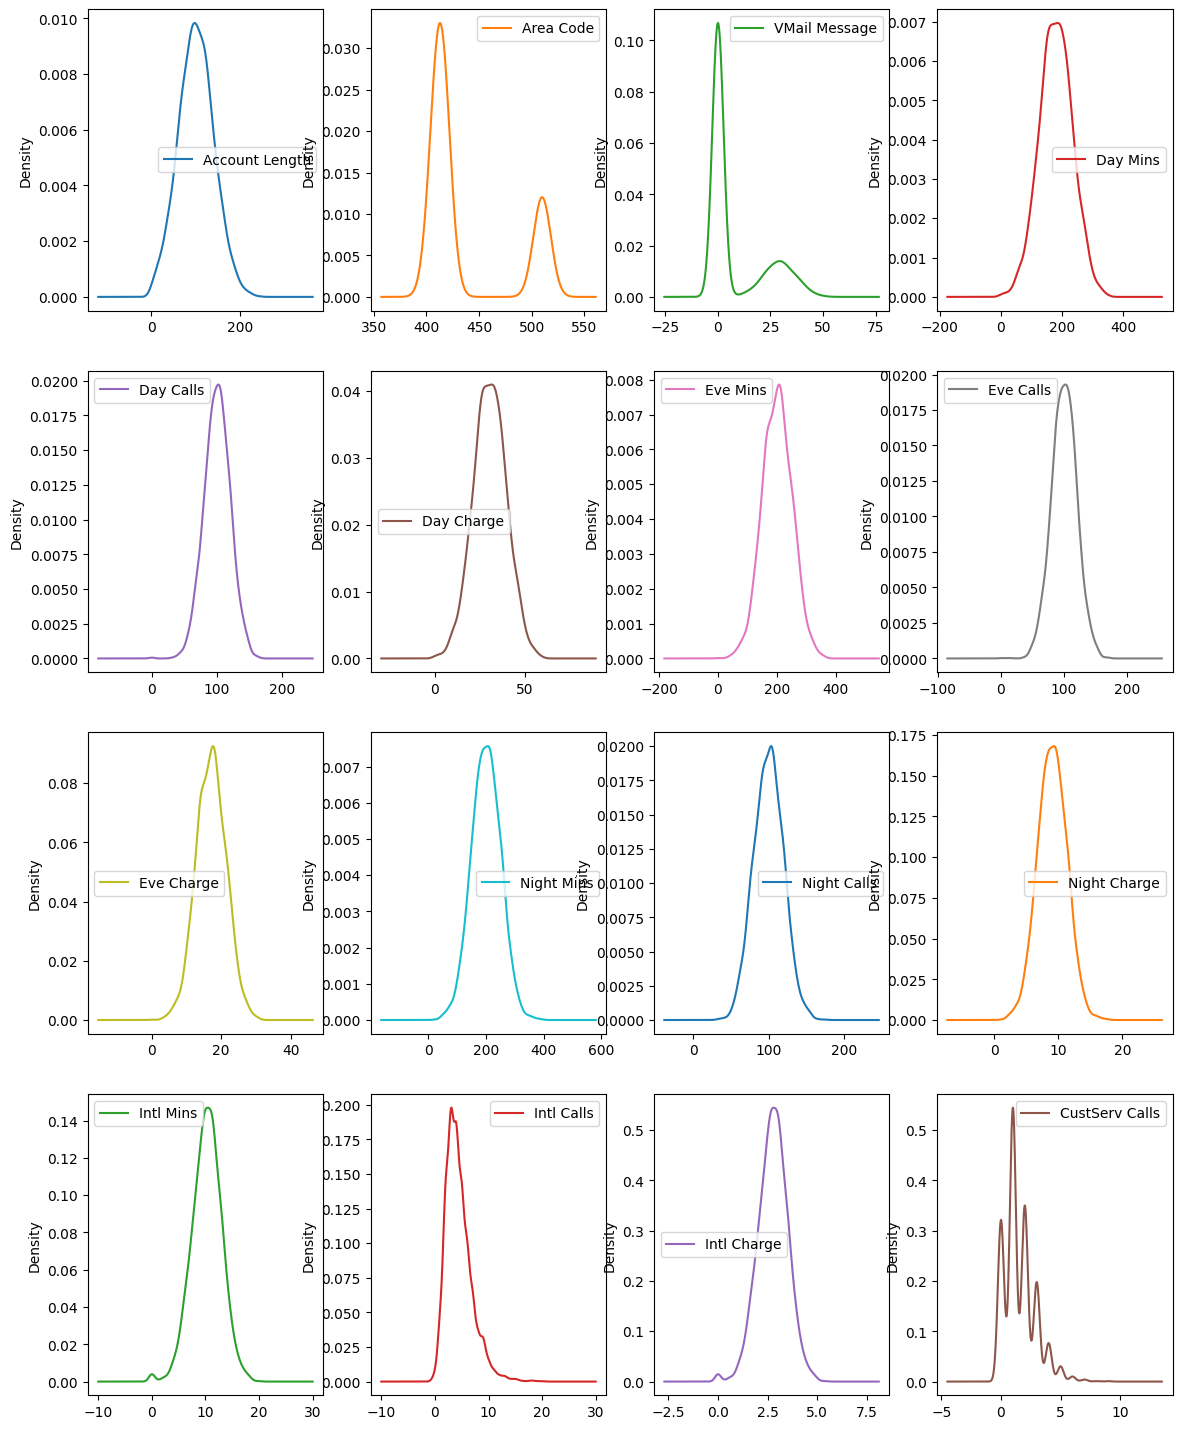

In [ ]:
churn.plot(figsize=(14,18),kind='density', subplots=True, layout=(4,4),sharex=False)
#Density plots are soomthed out histograms

<Axes: xlabel='CustServ Calls', ylabel='Density'>

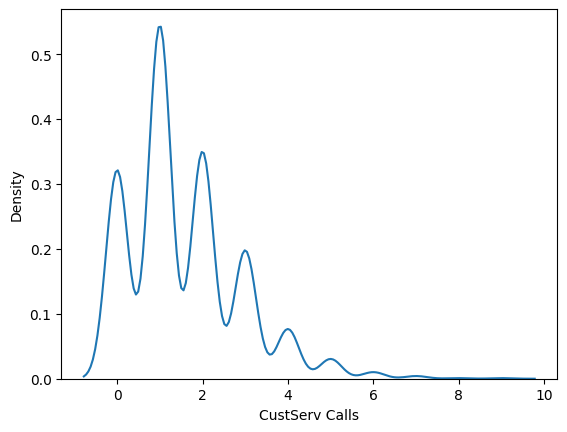

In [ ]:
#Seanborn
sns.kdeplot(churn["CustServ Calls"])
#The density plot is not suitable, as it is discrete numeric variables

<Axes: xlabel='CustServ Calls', ylabel='Count'>

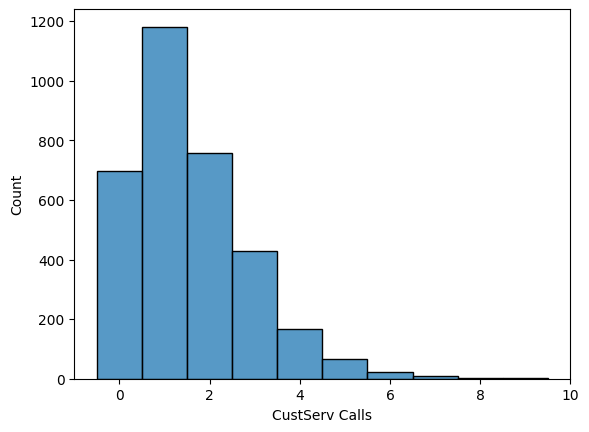

In [ ]:
sns.histplot(x="CustServ Calls", discrete=True, data=churn)
#Effect of discreret, use historgrams, discrete = True

<Axes: xlabel='CustServ Calls', ylabel='Count'>

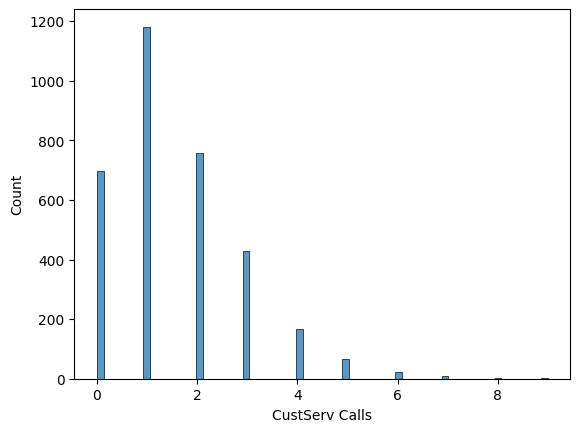

In [ ]:
sns.histplot(x="CustServ Calls",data=churn)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'Account Length'),
  Text(2, 0, 'Area Code'),
  Text(3, 0, 'VMail Message'),
  Text(4, 0, 'Day Mins'),
  Text(5, 0, 'Day Calls'),
  Text(6, 0, 'Day Charge'),
  Text(7, 0, 'Eve Mins'),
  Text(8, 0, 'Eve Calls'),
  Text(9, 0, 'Eve Charge'),
  Text(10, 0, 'Night Mins'),
  Text(11, 0, 'Night Calls'),
  Text(12, 0, 'Night Charge'),
  Text(13, 0, 'Intl Mins'),
  Text(14, 0, 'Intl Calls'),
  Text(15, 0, 'Intl Charge'),
  Text(16, 0, 'CustServ Calls')])

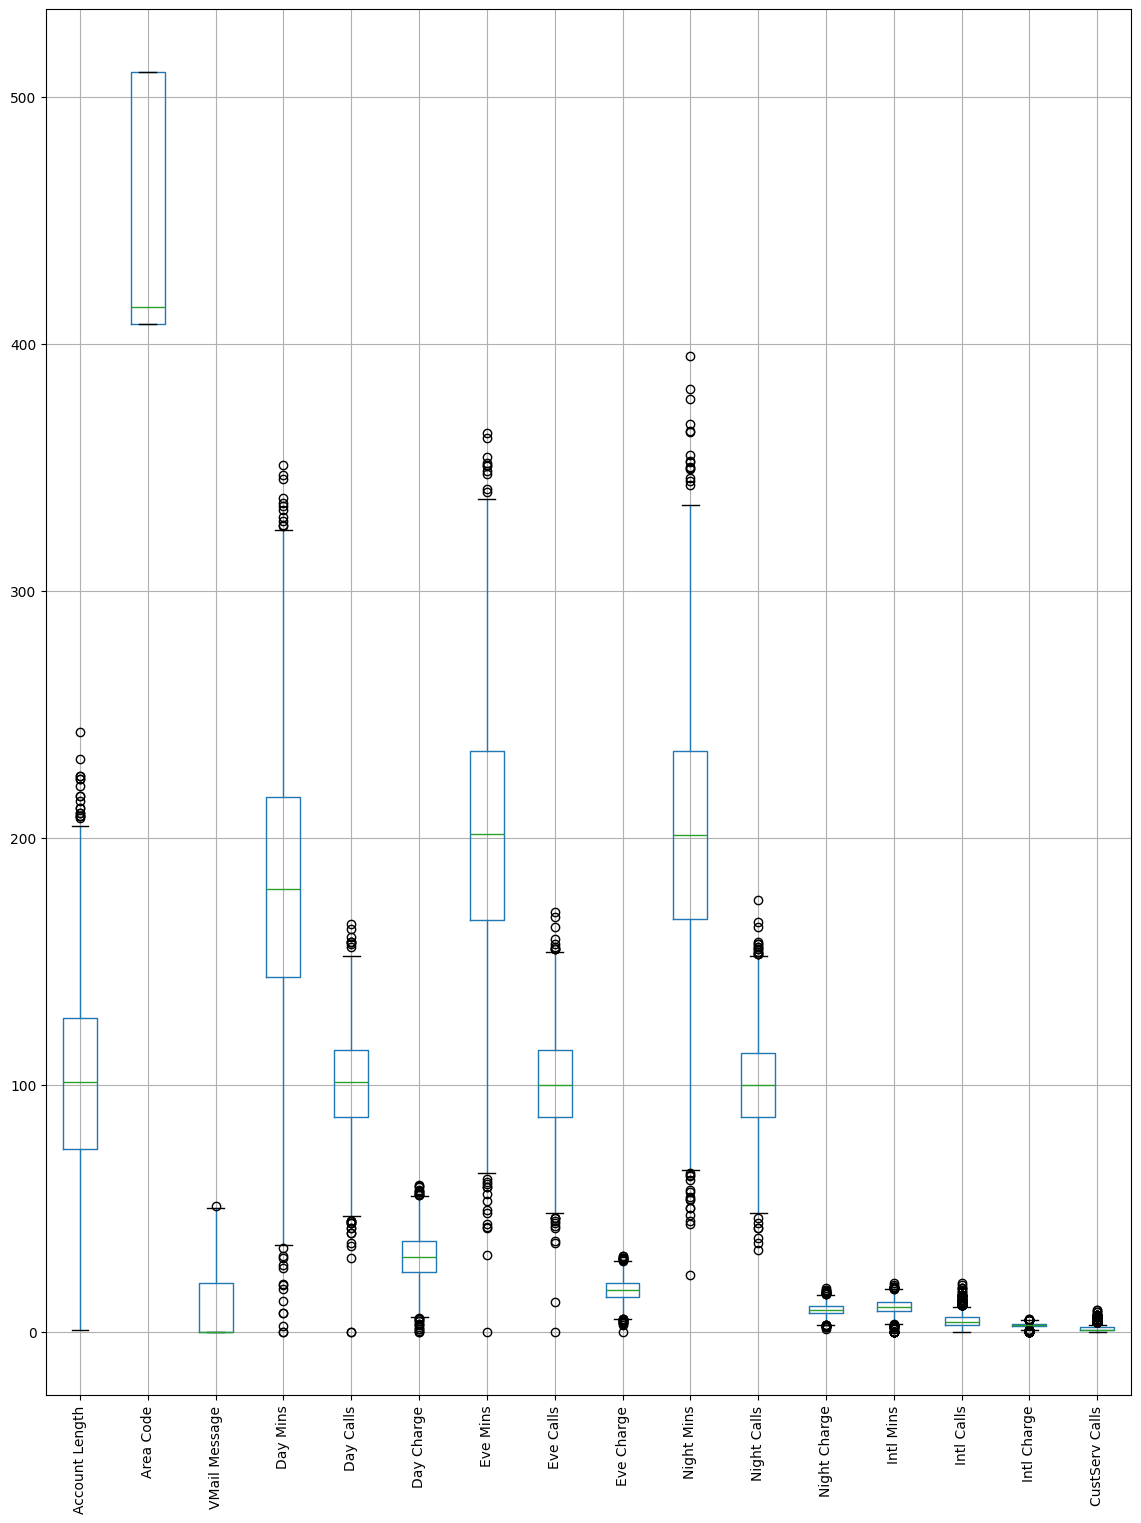

In [ ]:
churn.boxplot(figsize=(14,18))
# Two comments directly, first the labels are overlapped
plt.xticks(rotation = 90)
# All of the boxplot with different horizons are in one graph, collaepsed, can't read anything with  one single aixes
# Urge the need of algorithms to rescale all the variables, as different variables are treated differently.
#KNN methods also use the rescaling method

,0
Account Length,"Axes(0.125,0.712609;0.168478x0.167391)"
Area Code,"Axes(0.327174,0.712609;0.168478x0.167391)"
VMail Message,"Axes(0.529348,0.712609;0.168478x0.167391)"
Day Mins,"Axes(0.731522,0.712609;0.168478x0.167391)"
Day Calls,"Axes(0.125,0.511739;0.168478x0.167391)"
Day Charge,"Axes(0.327174,0.511739;0.168478x0.167391)"
Eve Mins,"Axes(0.529348,0.511739;0.168478x0.167391)"
Eve Calls,"Axes(0.731522,0.511739;0.168478x0.167391)"
Eve Charge,"Axes(0.125,0.31087;0.168478x0.167391)"
Night Mins,"Axes(0.327174,0.31087;0.168478x0.167391)"


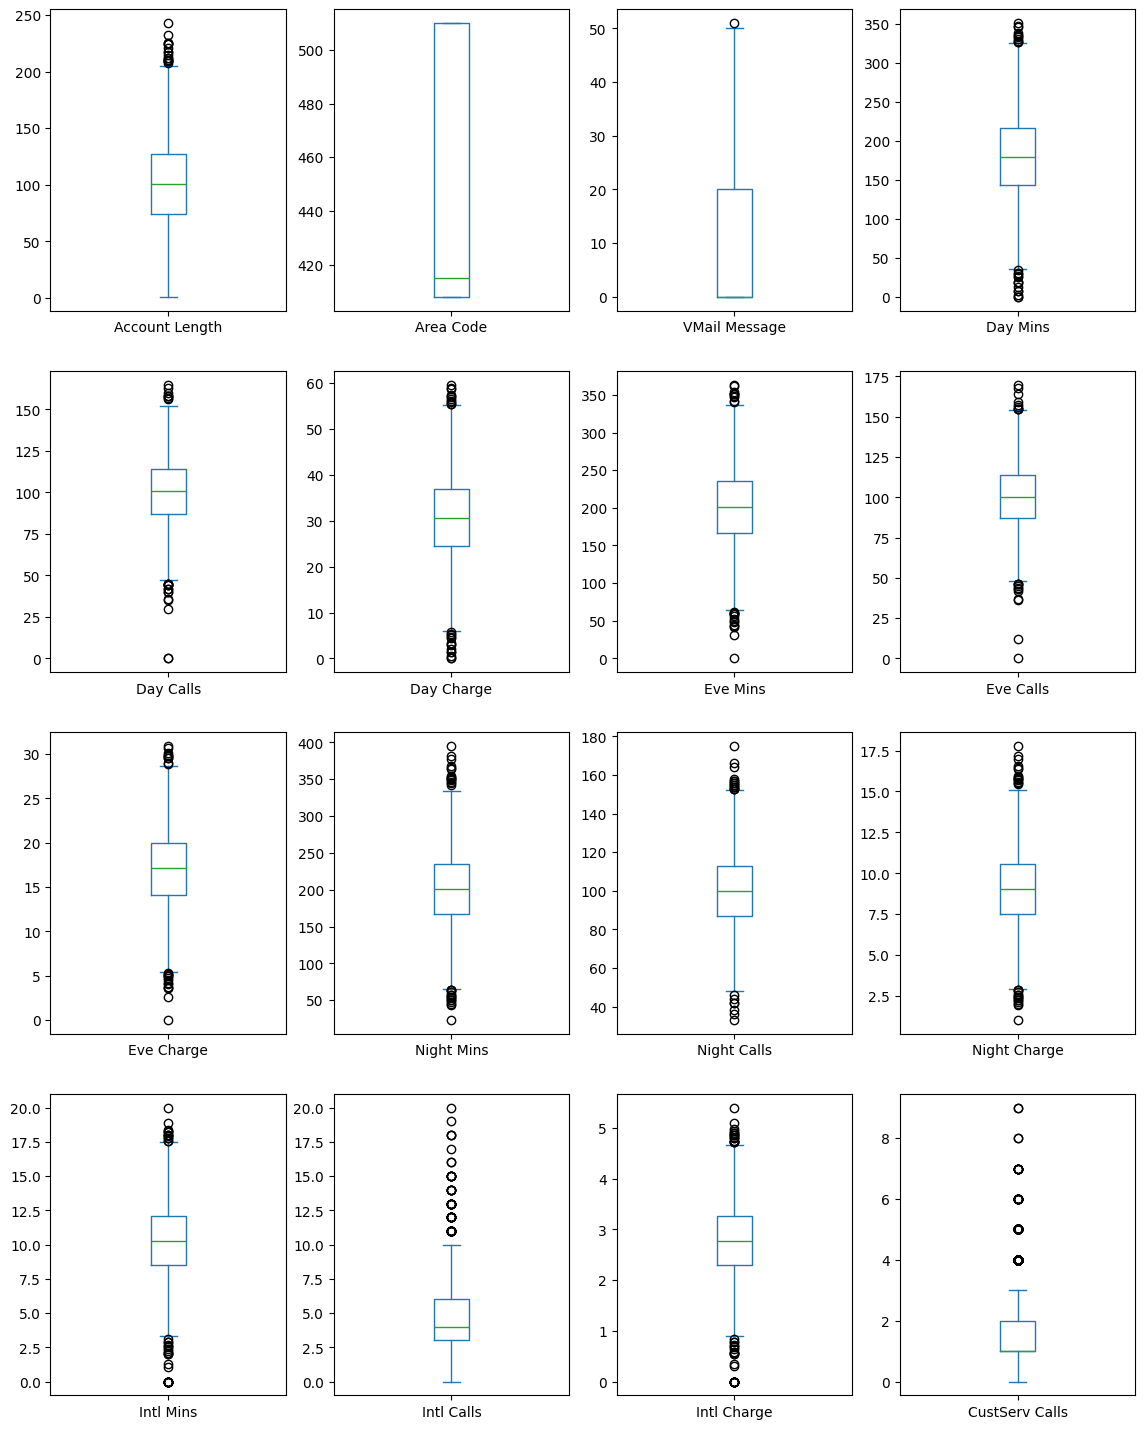

In [ ]:
churn.plot(figsize=(14,18),kind='box', subplots=True, layout=(4,4),sharex=False, sharey = False)
# copy and paste the function for density in the matplotlib, seperate the x-axis and y-aixs
# some nice shaped normal distribution
# IQR- Inter-Quatile Range 1.5 *Q3- Q1

<Axes: xlabel='Churn?', ylabel='CustServ Calls'>

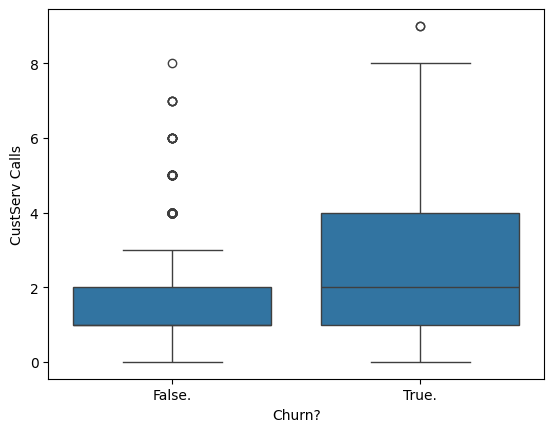

In [ ]:
# Seaborn boxplot
sns.boxplot(x=churn["Churn?"], y=churn["CustServ Calls"], data=churn)
#Using the boxplot distinguish between the churn rate and the customers service calls numbers

In [ ]:
# Separate variable Customer Service Calls by the two values of the target
churn_csc_T = churn[churn["Churn?"] == "True."] ["CustServ Calls"]
churn_csc_F = churn[churn["Churn?"] == "False."] ["CustServ Calls"]


Text(0, 0.5, 'Frequency')

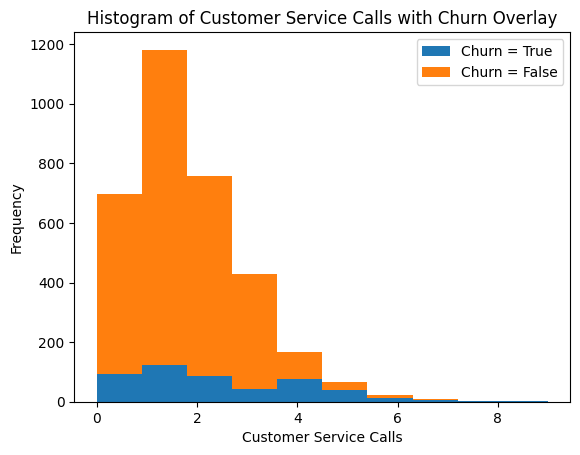

In [ ]:
# Create a stacked histogram of the two variables
plt.hist([churn_csc_T, churn_csc_F], bins = 10, stacked = True)
plt.legend(['Churn = True', 'Churn = False'])
plt.title('Histogram of Customer Service Calls with Churn Overlay')
plt.xlabel('Customer Service Calls')
plt.ylabel('Frequency')


([<matplotlib.axis.XTick at 0x7fbea8efa930>,
 [Text(0.45, 0, '0'),
  Text(1.35, 0, '1'),
  Text(2.25, 0, '2'),
  Text(3.1500000000000004, 0, '3'),
  Text(4.05, 0, '4'),
  Text(4.95, 0, '5'),
  Text(5.8500000000000005, 0, '6'),
  Text(6.75, 0, '7'),
  Text(7.65, 0, '8'),
  Text(8.549999999999999, 0, '9')])

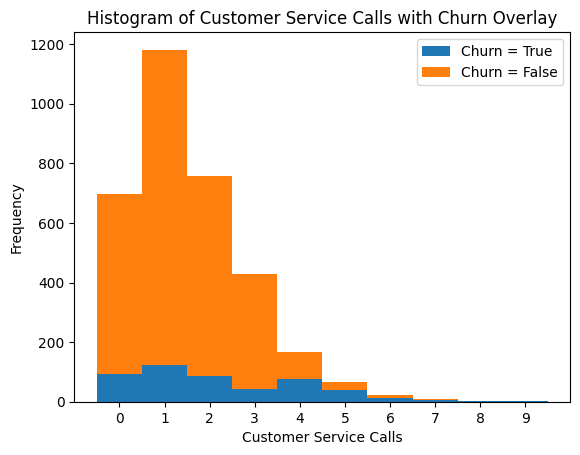

In [ ]:
# Create a stacked histogram of the two variables
plt.hist([churn_csc_T, churn_csc_F], bins = 10, stacked = True) # commen-size historgram normalized has not been created for many years
plt.legend(['Churn = True', 'Churn = False'])
plt.title('Histogram of Customer Service Calls with Churn Overlay')
plt.xlabel('Customer Service Calls')
plt.ylabel('Frequency')
xlabels = np.arange(10)  # the labels
xpos = [x*0.9+0.45 for x in xlabels]  # the label locations
plt.xticks(xpos, xlabels)
# Centralized in the matplot x-aixs

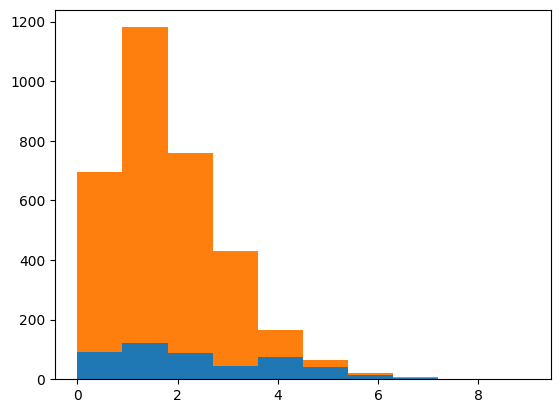

In [ ]:
# Separate variable Customer Service Calls by the two values of the target
churn_csc_T = churn[churn["Churn?"] == "True."] ["CustServ Calls"]
churn_csc_F = churn[churn["Churn?"] == "False."] ["CustServ Calls"]
# Take out the sum, recale the coordinates, for churn True, churn False
(n, bins, patches) = plt.hist([churn_csc_T, churn_csc_F], bins = 10, stacked = True)


In [ ]:
# One Discrete Numeric Variale and a targted catergorical variale (Catergorical Qualitative) stacked using a normalized stacked historgram.
n[1] = n[1] - n[0]
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

<BarContainer object of 10 artists>

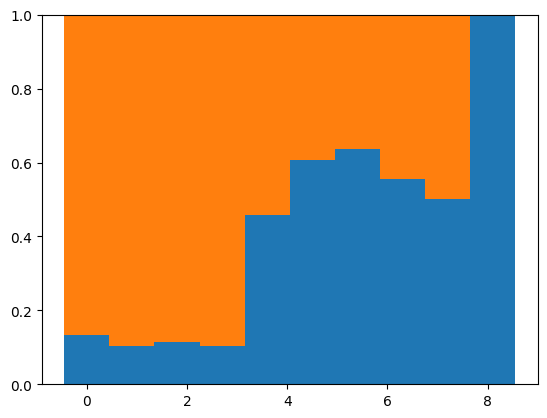

In [ ]:
plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1] - ourbins[:, 0])
plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] - ourbins[:, 0],bottom = n_norm[:,0])
# Work with the coordinates of the variables historgram

In [ ]:
# Plotly implement in the web page, use the plotly functions and package
import plotly.express as px
fig = px.histogram(churn, x="CustServ Calls", color="Churn?", barnorm='fraction')
#fig.data = fig.data[::-1]

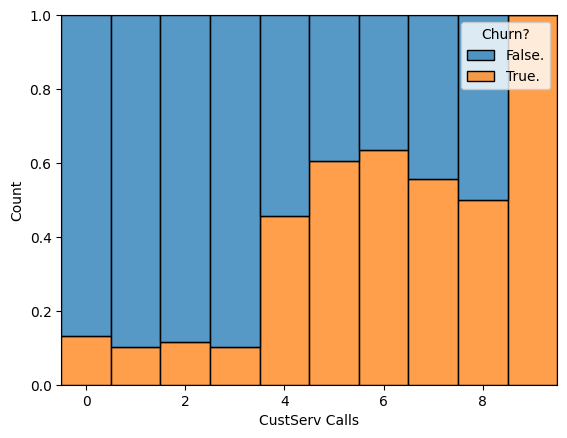

In [ ]:
ax = sns.histplot(x="CustServ Calls", hue="Churn?", discrete=True, multiple="fill", data=churn) #Want to distuin num and non chun, wnat discrete, and fill all bins with 100%
#Look at the multiple sepeart bins in each bar, equals to barnorm, shading of subgroup in the data for seaborn
# This is the single one liner, play with plotly

<Axes: xlabel='Day Mins', ylabel='Eve Mins'>

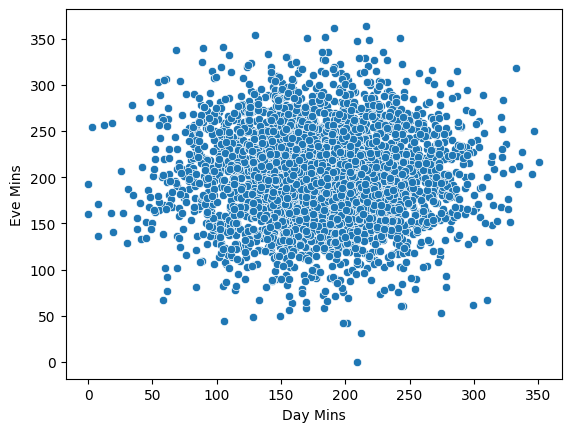

In [ ]:
sns.scatterplot(x="Day Mins", y="Eve Mins", data=churn) # USeing seaborn for scatterplot need an dataset info add parameter

In [ ]:
# Week Two Lecture Two Exploratory Data Analysis Cont'd

<Axes: xlabel='Day Mins', ylabel='Eve Mins'>

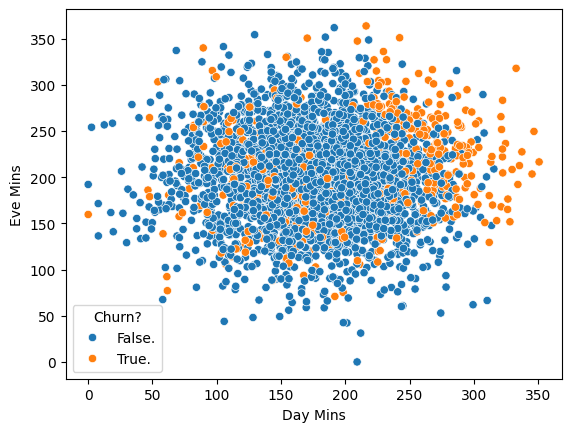

In [ ]:
# The scatterplot of two numerical variables on x-axies and y-axies, colored / catergorized by catergorial variable
sns.scatterplot(x="Day Mins", y="Eve Mins", hue = "Churn?", data=churn) #Hue differentiate a catergorcial vairales you want to use in scatter plot

<Axes: xlabel='Day Mins', ylabel='CustServ Calls'>

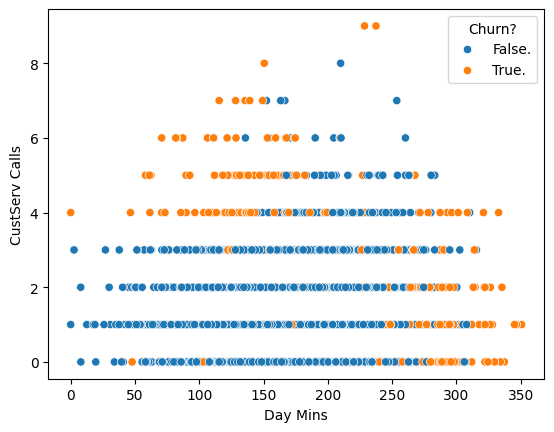

In [ ]:
sns.scatterplot(x="Day Mins", y="CustServ Calls", hue = "Churn?", data=churn)

In [ ]:
# Spacific the cutoff vakue change the numberica into catergorical variables,for the two avriables catergorical variable use the cross table and plot the staked hsitogram of cross table
churn['Eve Mins binned'] = pd.cut(x = churn['Eve Mins'], bins = [0, 160.01, 240.01, 400], labels=["Low", "Medium", "High"], right = False)


<Axes: title={'center': 'Bar Graph of Evening Minutes (Binned) with Churn Overlay'}, xlabel='Churn?'>

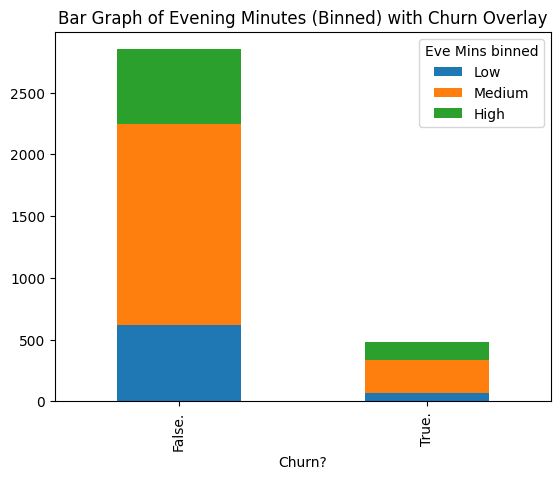

In [ ]:
churn_crosstab = pd.crosstab(churn["Churn?"], churn["Eve Mins binned"])
churn_crosstab.plot(kind = 'bar', stacked = True, title = 'Bar Graph of Evening Minutes (Binned) with Churn Overlay')
# Filp the aixes for comparision different minutes classes: The graph need to be change the x-aixs into the catergries variables for evening minutes, y-aixs is churn?

<Axes: title={'center': 'Bar Graph of Evening Minutes (Binned) with Churn Overlay'}, xlabel='Eve Mins binned'>

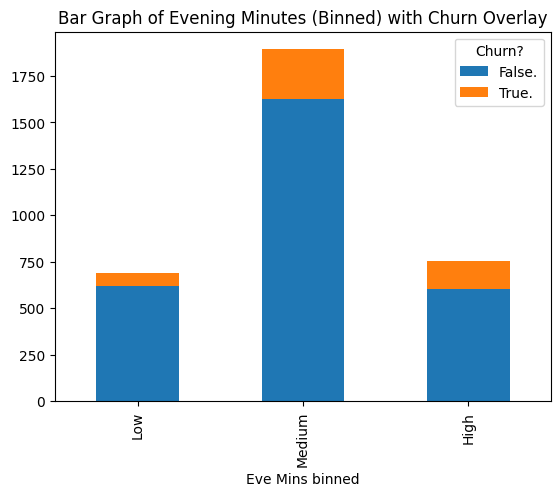

In [ ]:
# and pivoted:
churn_crosstab = pd.crosstab(churn["Eve Mins binned"], churn["Churn?"])
churn_crosstab.plot(kind = 'bar', stacked = True, title = 'Bar Graph of Evening Minutes (Binned) with Churn Overlay')
# Caution: After class change the histogram into normalized

array([[<Axes: xlabel='Account Length', ylabel='Account Length'>,
        <Axes: xlabel='Area Code', ylabel='Account Length'>,
        <Axes: xlabel='VMail Message', ylabel='Account Length'>,
        <Axes: xlabel='Day Mins', ylabel='Account Length'>,
        <Axes: xlabel='Day Calls', ylabel='Account Length'>,
        <Axes: xlabel='Day Charge', ylabel='Account Length'>,
        <Axes: xlabel='Eve Mins', ylabel='Account Length'>,
        <Axes: xlabel='Eve Calls', ylabel='Account Length'>,
        <Axes: xlabel='Eve Charge', ylabel='Account Length'>,
        <Axes: xlabel='Night Mins', ylabel='Account Length'>,
        <Axes: xlabel='Night Calls', ylabel='Account Length'>,
        <Axes: xlabel='Night Charge', ylabel='Account Length'>,
        <Axes: xlabel='Intl Mins', ylabel='Account Length'>,
        <Axes: xlabel='Intl Calls', ylabel='Account Length'>,
        <Axes: xlabel='Intl Charge', ylabel='Account Length'>,
        <Axes: xlabel='CustServ Calls', ylabel='Account Length'>],


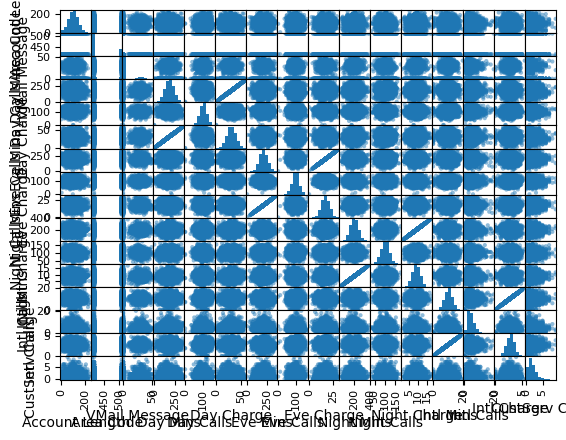

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(churn)
# Day minutes, Evening Minutes, International Minutes ~ Charge
# Why hiastograms?

In [ ]:
# correlation matrix
correlations = churn.corr(numeric_only = True)
correlations
# See in Jupyternotebook as a Dataframe as more clearly
# Seaborn is a one liner for the heat maps

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Account Length,1.000,-0.012,-4.628e-03,6.216e-03,0.038,6.214e-03,-0.007,0.019,-0.007,-0.009,-1.318e-02,-0.009,0.010,2.066e-02,0.010,-0.004
Area Code,-0.012,1.000,-1.994e-03,-8.264e-03,-0.010,-8.264e-03,0.004,-0.012,0.004,-0.006,1.652e-02,-0.006,-0.018,-2.418e-02,-0.018,0.028
VMail Message,-0.005,-0.002,1.000e+00,7.783e-04,-0.010,7.755e-04,0.018,-0.006,0.018,0.008,7.123e-03,0.008,0.003,1.396e-02,0.003,-0.013
Day Mins,0.006,-0.008,7.783e-04,1.000e+00,0.007,1.000e+00,0.007,0.016,0.007,0.004,2.297e-02,0.004,-0.010,8.033e-03,-0.010,-0.013
Day Calls,0.038,-0.010,-9.548e-03,6.750e-03,1.000,6.753e-03,-0.021,0.006,-0.021,0.023,-1.956e-02,0.023,0.022,4.574e-03,0.022,-0.019
Day Charge,0.006,-0.008,7.755e-04,1.000e+00,0.007,1.000e+00,0.007,0.016,0.007,0.004,2.297e-02,0.004,-0.010,8.032e-03,-0.010,-0.013
Eve Mins,-0.007,0.004,1.756e-02,7.043e-03,-0.021,7.050e-03,1.000,-0.011,1.000,-0.013,7.586e-03,-0.013,-0.011,2.541e-03,-0.011,-0.013
Eve Calls,0.019,-0.012,-5.864e-03,1.577e-02,0.006,1.577e-02,-0.011,1.000,-0.011,-0.002,7.710e-03,-0.002,0.009,1.743e-02,0.009,0.002
Eve Charge,-0.007,0.004,1.758e-02,7.029e-03,-0.021,7.036e-03,1.000,-0.011,1.000,-0.013,7.596e-03,-0.013,-0.011,2.541e-03,-0.011,-0.013
Night Mins,-0.009,-0.006,7.681e-03,4.323e-03,0.023,4.324e-03,-0.013,-0.002,-0.013,1.000,1.120e-02,1.000,-0.015,-1.235e-02,-0.015,-0.009


[Text(0, 0, 'Account Length'),
 Text(0, 1, 'Area Code'),
 Text(0, 2, 'VMail Message'),
 Text(0, 3, 'Day Mins'),
 Text(0, 4, 'Day Calls'),
 Text(0, 5, 'Day Charge'),
 Text(0, 6, 'Eve Mins'),
 Text(0, 7, 'Eve Calls'),
 Text(0, 8, 'Eve Charge'),
 Text(0, 9, 'Night Mins'),
 Text(0, 10, 'Night Calls'),
 Text(0, 11, 'Night Charge'),
 Text(0, 12, 'Intl Mins'),
 Text(0, 13, 'Intl Calls'),
 Text(0, 14, 'Intl Charge'),
 Text(0, 15, 'CustServ Calls')]

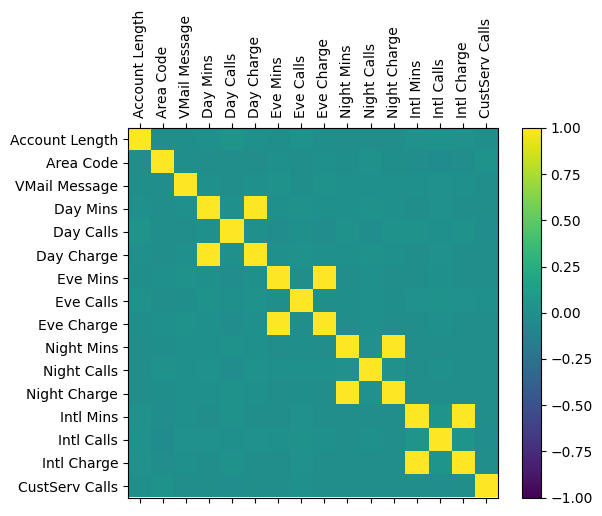

In [ ]:
# plot correlation matrix (generic)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
# Most of the coffcients are zero, a few corrlations are one, e.g. Night Charge, Internatonal changr

# change the tick labels
ticks = range(0,16,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
numeric_columns = churn.select_dtypes(include='number')
ax.set_xticklabels(numeric_columns, rotation=90)
ax.set_yticklabels(numeric_columns)


## Chapter 11 Hand-on Analysis:

For the excercises, use the churn_data, Set avaliable at the book series web sit Normalize the numerical data with the correlated variaale

In [ ]:
from pandas import set_option

In [ ]:
set_option('display.precision', 3)

In [ ]:
correlations = churn.corr(numeric_only = True)
correlations

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Account Length,1.000,-0.012,-4.628e-03,6.216e-03,0.038,6.214e-03,-0.007,0.019,-0.007,-0.009,-1.318e-02,-0.009,0.010,2.066e-02,0.010,-0.004
Area Code,-0.012,1.000,-1.994e-03,-8.264e-03,-0.010,-8.264e-03,0.004,-0.012,0.004,-0.006,1.652e-02,-0.006,-0.018,-2.418e-02,-0.018,0.028
VMail Message,-0.005,-0.002,1.000e+00,7.783e-04,-0.010,7.755e-04,0.018,-0.006,0.018,0.008,7.123e-03,0.008,0.003,1.396e-02,0.003,-0.013
Day Mins,0.006,-0.008,7.783e-04,1.000e+00,0.007,1.000e+00,0.007,0.016,0.007,0.004,2.297e-02,0.004,-0.010,8.033e-03,-0.010,-0.013
Day Calls,0.038,-0.010,-9.548e-03,6.750e-03,1.000,6.753e-03,-0.021,0.006,-0.021,0.023,-1.956e-02,0.023,0.022,4.574e-03,0.022,-0.019
Day Charge,0.006,-0.008,7.755e-04,1.000e+00,0.007,1.000e+00,0.007,0.016,0.007,0.004,2.297e-02,0.004,-0.010,8.032e-03,-0.010,-0.013
Eve Mins,-0.007,0.004,1.756e-02,7.043e-03,-0.021,7.050e-03,1.000,-0.011,1.000,-0.013,7.586e-03,-0.013,-0.011,2.541e-03,-0.011,-0.013
Eve Calls,0.019,-0.012,-5.864e-03,1.577e-02,0.006,1.577e-02,-0.011,1.000,-0.011,-0.002,7.710e-03,-0.002,0.009,1.743e-02,0.009,0.002
Eve Charge,-0.007,0.004,1.758e-02,7.029e-03,-0.021,7.036e-03,1.000,-0.011,1.000,-0.013,7.596e-03,-0.013,-0.011,2.541e-03,-0.011,-0.013
Night Mins,-0.009,-0.006,7.681e-03,4.323e-03,0.023,4.324e-03,-0.013,-0.002,-0.013,1.000,1.120e-02,1.000,-0.015,-1.235e-02,-0.015,-0.009


In [ ]:
churn.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Eve Mins binned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,Medium
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,Medium
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,Low
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,Low
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,Low
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False.,Medium
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False.,High
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False.,Low
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False.,High
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,18.87,326.4,97,14.69,11.2,5,3.02,0,False.,Medium


#### I first Transfer my targeted catergorical variable into a dummy numeric a variable in to 1 and 0

In [ ]:
churn["Churn?"] = churn["Churn?"].astype(str).str.strip().map({"True.":1, "False.":0})
churn["Churn?"] = churn["Churn?"].astype(float)

## Very fast list out all of my numerical variables in the Dataframe and plot their correlation matrics (when you having catergocial, IDs Unique Identifiers, string)

In [ ]:
correlations = churn.corr(numeric_only = True)
correlations

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
Account Length,1.000,-0.012,-4.628e-03,6.216e-03,0.038,6.214e-03,-0.007,0.019,-0.007,-0.009,-1.318e-02,-0.009,0.010,2.066e-02,0.010,-0.004,0.017
Area Code,-0.012,1.000,-1.994e-03,-8.264e-03,-0.010,-8.264e-03,0.004,-0.012,0.004,-0.006,1.652e-02,-0.006,-0.018,-2.418e-02,-0.018,0.028,0.006
VMail Message,-0.005,-0.002,1.000e+00,7.783e-04,-0.010,7.755e-04,0.018,-0.006,0.018,0.008,7.123e-03,0.008,0.003,1.396e-02,0.003,-0.013,-0.090
Day Mins,0.006,-0.008,7.783e-04,1.000e+00,0.007,1.000e+00,0.007,0.016,0.007,0.004,2.297e-02,0.004,-0.010,8.033e-03,-0.010,-0.013,0.205
Day Calls,0.038,-0.010,-9.548e-03,6.750e-03,1.000,6.753e-03,-0.021,0.006,-0.021,0.023,-1.956e-02,0.023,0.022,4.574e-03,0.022,-0.019,0.018
Day Charge,0.006,-0.008,7.755e-04,1.000e+00,0.007,1.000e+00,0.007,0.016,0.007,0.004,2.297e-02,0.004,-0.010,8.032e-03,-0.010,-0.013,0.205
Eve Mins,-0.007,0.004,1.756e-02,7.043e-03,-0.021,7.050e-03,1.000,-0.011,1.000,-0.013,7.586e-03,-0.013,-0.011,2.541e-03,-0.011,-0.013,0.093
Eve Calls,0.019,-0.012,-5.864e-03,1.577e-02,0.006,1.577e-02,-0.011,1.000,-0.011,-0.002,7.710e-03,-0.002,0.009,1.743e-02,0.009,0.002,0.009
Eve Charge,-0.007,0.004,1.758e-02,7.029e-03,-0.021,7.036e-03,1.000,-0.011,1.000,-0.013,7.596e-03,-0.013,-0.011,2.541e-03,-0.011,-0.013,0.093
Night Mins,-0.009,-0.006,7.681e-03,4.323e-03,0.023,4.324e-03,-0.013,-0.002,-0.013,1.000,1.120e-02,1.000,-0.015,-1.235e-02,-0.015,-0.009,0.035


## Stored all pre-used variables into a new namelist (numerical correlated variables and targeted dummy variable)

In [ ]:
newChurn_names = ['CustServ Calls','Intl Calls', 'Eve Charge','Day Mins','VMail Message', 'Churn?']

In [ ]:
newChurn_names

['CustServ Calls',
 'Intl Calls',
 'Eve Charge',
 'Day Mins',
 'VMail Message',
 'Churn?']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
churn

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Eve Mins binned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0,Medium
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0,Medium
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0,Low
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0,Low
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,18.32,279.1,83,12.56,9.9,6,2.67,2,0.0,Medium
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,13.04,191.3,123,8.61,9.6,4,2.59,3,0.0,Low
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,24.55,191.9,91,8.64,14.1,6,3.81,2,0.0,High
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,13.57,139.2,137,6.26,5.0,10,1.35,2,0.0,Low


##  abstracting the columns with the namelist in the orginal dataframe (used datapreprocess module 7 and cha2 dmbap)

In [ ]:
df_newChurn = churn[newChurn_names]

In [ ]:
df_newChurn

,CustServ Calls,Intl Calls,Eve Charge,Day Mins,VMail Message,Churn?
0,1,3,16.78,265.1,25,0.0
1,1,3,16.62,161.6,26,0.0
2,0,5,10.30,243.4,0,0.0
3,2,7,5.26,299.4,0,0.0
4,3,3,12.61,166.7,0,0.0
...,...,...,...,...,...,...
3328,2,6,18.32,156.2,36,0.0
3329,3,4,13.04,231.1,0,0.0
3330,2,6,24.55,180.8,0,0.0
3331,2,10,13.57,213.8,0,0.0


In [ ]:
scaler = MinMaxScaler().fit(df_newChurn)
rescaled_newChurn = scaler.transform(df_newChurn)

In [ ]:

rescaled_newChurn

array([[0.11111111, 0.15      , 0.54286639, 0.75570125, 0.49019608,
        0.        ],
       [0.11111111, 0.15      , 0.53769007, 0.46066135, 0.50980392,
        0.        ],
       [0.        , 0.25      , 0.33322549, 0.69384265, 0.        ,
        0.        ],
       ...,
       [0.22222222, 0.3       , 0.79424135, 0.51539339, 0.        ,
        0.        ],
       [0.22222222, 0.5       , 0.4390165 , 0.60946408, 0.        ,
        0.        ],
       [0.        , 0.2       , 0.73115497, 0.668187  , 0.49019608,
        0.        ]])

In [ ]:
df_newChurn

,CustServ Calls,Intl Calls,Eve Charge,Day Mins,VMail Message,Churn?
0,1,3,16.78,265.1,25,0.0
1,1,3,16.62,161.6,26,0.0
2,0,5,10.30,243.4,0,0.0
3,2,7,5.26,299.4,0,0.0
4,3,3,12.61,166.7,0,0.0
...,...,...,...,...,...,...
3328,2,6,18.32,156.2,36,0.0
3329,3,4,13.04,231.1,0,0.0
3330,2,6,24.55,180.8,0,0.0
3331,2,10,13.57,213.8,0,0.0


In [ ]:
rescaled_newChurn = pd.DataFrame(rescaled_newChurn, columns=df_newChurn.columns, index=df_newChurn.index)
rescaled_newChurn

,CustServ Calls,Intl Calls,Eve Charge,Day Mins,VMail Message,Churn?
0,0.111,0.15,0.543,0.756,0.490,0.0
1,0.111,0.15,0.538,0.461,0.510,0.0
2,0.000,0.25,0.333,0.694,0.000,0.0
3,0.222,0.35,0.170,0.853,0.000,0.0
4,0.333,0.15,0.408,0.475,0.000,0.0
...,...,...,...,...,...,...
3328,0.222,0.30,0.593,0.445,0.706,0.0
3329,0.333,0.20,0.422,0.659,0.000,0.0
3330,0.222,0.30,0.794,0.515,0.000,0.0
3331,0.222,0.50,0.439,0.609,0.000,0.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt


In [ ]:
%pip install dmba

In [ ]:
from dmba import plotDecisionTree, classificationSummary

In [ ]:
X =rescaled_newChurn.iloc[:,:-1]

In [ ]:
X

,CustServ Calls,Intl Calls,Eve Charge,Day Mins,VMail Message
0,0.111,0.15,0.543,0.756,0.490
1,0.111,0.15,0.538,0.461,0.510
2,0.000,0.25,0.333,0.694,0.000
3,0.222,0.35,0.170,0.853,0.000
4,0.333,0.15,0.408,0.475,0.000
...,...,...,...,...,...
3328,0.222,0.30,0.593,0.445,0.706
3329,0.333,0.20,0.422,0.659,0.000
3330,0.222,0.30,0.794,0.515,0.000
3331,0.222,0.50,0.439,0.609,0.000


In [ ]:
y =rescaled_newChurn.iloc[:,-1]

In [ ]:
y

,Churn?
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3328,0.0
3329,0.0
3330,0.0
3331,0.0


In [ ]:
test_size = 0.20
seed=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
#num_folds = 10

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
param_grid = {'min_samples_leaf': [50, 55, 60, 65, 70, 75, 80],'min_samples_split':  [50, 55, 60, 65, 70, 75, 80] }
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state =1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial Parameters:', gridSearch.best_params_)
print('Initial score:', gridSearch.best_score_)

Initial Parameters: {'min_samples_leaf': 50, 'min_samples_split': 50}
Initial score: 0.8912241499251639


In [ ]:
gridSearch.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 1,
 'splitter': 'best'}

In [ ]:
param_grid = {'max_depth':[5],'min_samples_leaf': [50, 55, 60, 65, 70, 75, 80], 'min_samples_leaf': [50, 55, 60, 65, 70, 75, 80],  'min_samples_split': [68,69,70, 72,74, 75, 80] }

gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Improved score:', gridSearch.best_score_)
print('Improved parameters:', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

Improved score: 0.8912241499251639
Improved parameters: {'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 68}


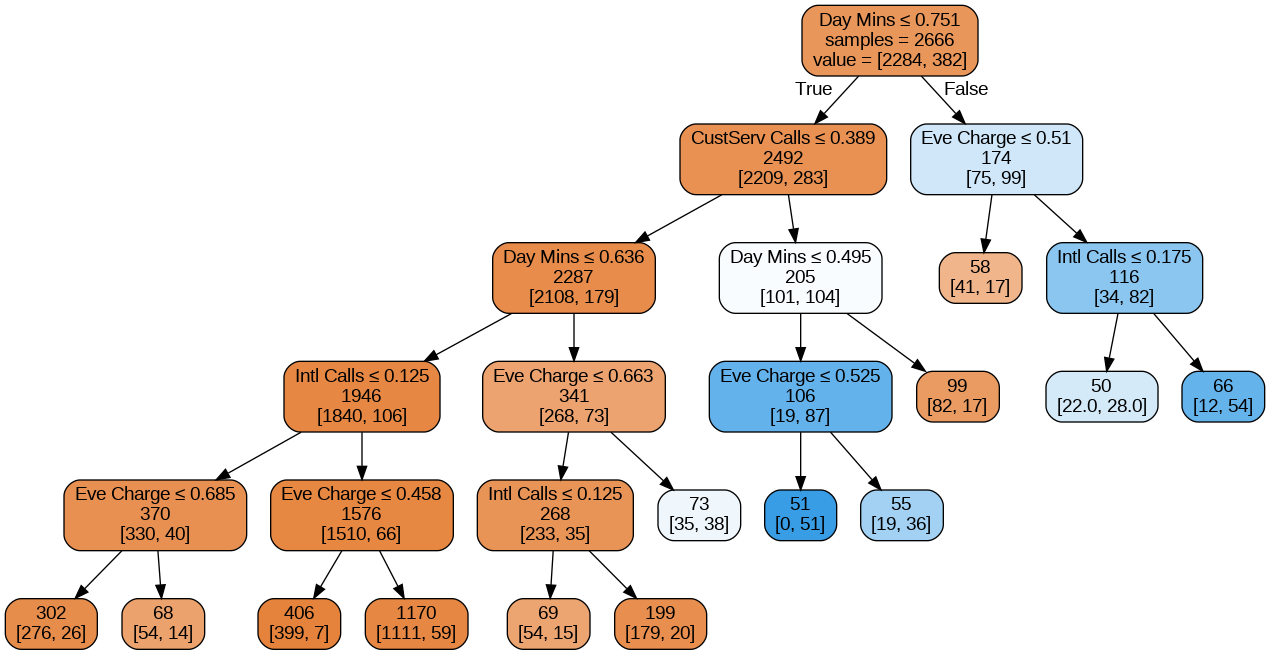

In [ ]:
plotDecisionTree(bestClassTree, feature_names=X_train.columns)

In [ ]:
regTree = gridSearch.best_estimator_
regTree.fit(X_train, y_train )

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=68)

In [ ]:
classificationSummary(y_train, regTree.predict(X_train))
classificationSummary(y_test, regTree.predict(X_test))

Confusion Matrix (Accuracy 0.9014)

       Prediction
Actual    0    1
     0 2196   88
     1  175  207
Confusion Matrix (Accuracy 0.8951)

       Prediction
Actual   0   1
     0 539  27
     1  43  58
